<a href="https://colab.research.google.com/github/Git053/Alpha-Factor-Research/blob/main/VPIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install flowrisk

In [32]:
import flowrisk as fr
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd 
gs = pd.read_csv('/content/drive/MyDrive/data/ETHUSDT12.csv', sep=',')

In [55]:
gs = gs.drop(labels=range(4000, 655218))

In [56]:
gs

,date,5. volume,4. close,2. high,1. open,3. low
0,2020-01-01-0:00,305.44687,129.02,129.19,129.16,128.96
1,2020-01-01-0:01,118.00168,129.02,129.11,128.99,128.99
2,2020-01-01-0:02,141.64707,128.98,129.05,129.00,128.94
3,2020-01-01-0:03,29.11515,128.98,129.02,128.95,128.94
4,2020-01-01-0:04,102.50335,128.88,128.97,128.97,128.80
...,...,...,...,...,...,...
3995,2020-01-03-18:35,42.72024,133.97,133.97,133.93,133.85
3996,2020-01-03-18:36,47.82664,133.90,133.97,133.94,133.90
3997,2020-01-03-18:37,44.35261,133.96,134.00,133.91,133.89
3998,2020-01-03-18:38,23.01340,133.90,133.98,133.94,133.87


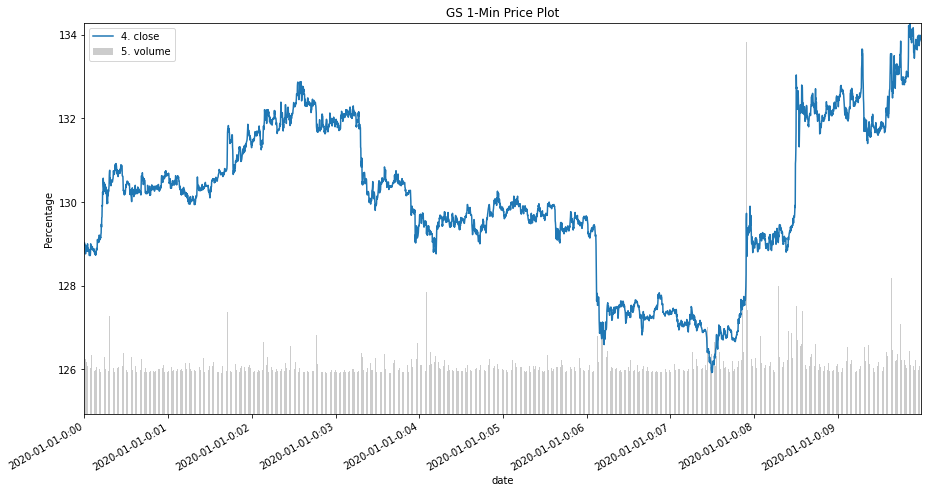

In [58]:
gs_volume = gs.loc[:, ['date', '5. volume']]
gs_volume.loc[:, '5. volume'] -= gs_volume.loc[:, '5. volume'].min()
gs_volume.loc[:, '5. volume'] /= gs_volume.loc[:, '5. volume'].max()
gs_volume.loc[:, '5. volume'] *= (gs['4. close'].max() - gs['4. close'].min()) * 2.0
gs_volume.loc[:, '5. volume'] += gs['4. close'].min()

ax = gs.plot(
    x='date',
    y='4. close',
    title='ETH 1-Min Price Plot'
)

gs_volume.plot(
    x='date',
    y='5. volume',
    color='black',
    kind='bar',
    alpha=0.2,
    ax=ax,
    ylim=[gs['4. close'].min()-1.0, gs['4. close'].max()],
    figsize=[15, 8]
)
ax.set_ylabel("Percentage")
ax.locator_params(axis='x', nbins=10)
ax.figure.autofmt_xdate()

In [59]:
class Config(fr.BulkVPINConfig):
    
    TIME_BAR_TIME_STAMP_COL_NAME = 'date'
    TIME_BAR_PRICE_COL_NAME = '4. close'
    TIME_BAR_VOLUME_COL_NAME = '5. volume'
    
    N_TIME_BAR_FOR_INITIALIZATION = 50

config = Config()
config.summary()


Configurations:

BAND_ESTIMATOR                 RecursiveEWMABand
BUCKETS                        RecursiveBulkClassMABuckets
BUCKET_MAX_VOLUME              100000.0
N_BUCKET_OR_BUCKET_DECAY       20
N_TIME_BAR_FOR_INITIALIZATION  50
SYMBOL                         
TIME_BAR_PRICE_COL_NAME        4. close
TIME_BAR_TIME_STAMP_COL_NAME   date
TIME_BAR_VOLUME_COL_NAME       5. volume
VOL_DECAY                      0.8
VOL_ESTIMATOR                  RecursiveEWMAVol
VPIN_CONF_INTERVAL_RADIUS      2.0
VPIN_MEAN_EWMA_DECAY           0.9
VPIN_VOL_EWMA_DECAY            0.99




In [60]:
gs_vpin_estimator = fr.BulkVPIN(config)
gs_vpins = gs_vpin_estimator.estimate(gs)
gs_vpins.describe()

,vpin
count,4000.000000
mean,0.069799
std,0.037479
min,0.000003
25%,0.027980
50%,0.077815
75%,0.097044
max,0.160800


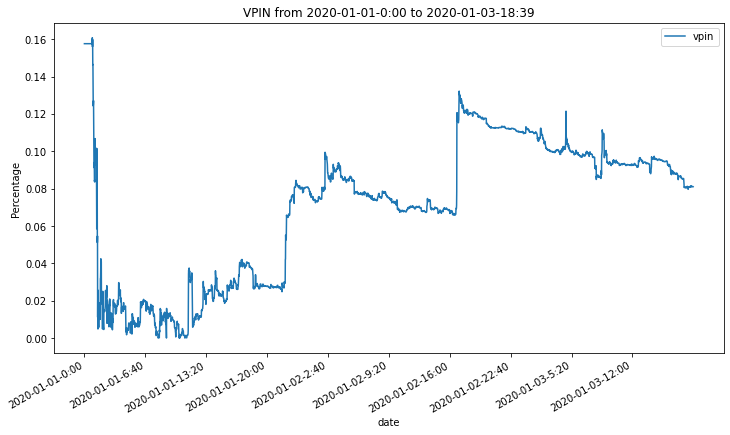

In [65]:
gs_vpin_estimator.plot()


In [69]:
gs_conf_vpin_estimator = fr.BulkConfVPIN(config)
gs_vpins_and_conf_intervals = gs_conf_vpin_estimator.estimate(gs)
gs_vpins_and_conf_intervals.describe()

,vpin,vpin_lower_band,vpin_mean,vpin_upper_band
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.069799,0.065384,0.069237,0.076034
std,0.037479,0.039380,0.037542,0.033124
min,0.000003,0.000103,0.000703,0.002599
25%,0.027980,0.023562,0.027662,0.048247
50%,0.077815,0.074443,0.077123,0.081174
75%,0.097044,0.094405,0.096778,0.099173
max,0.160800,0.157655,0.158106,0.159977


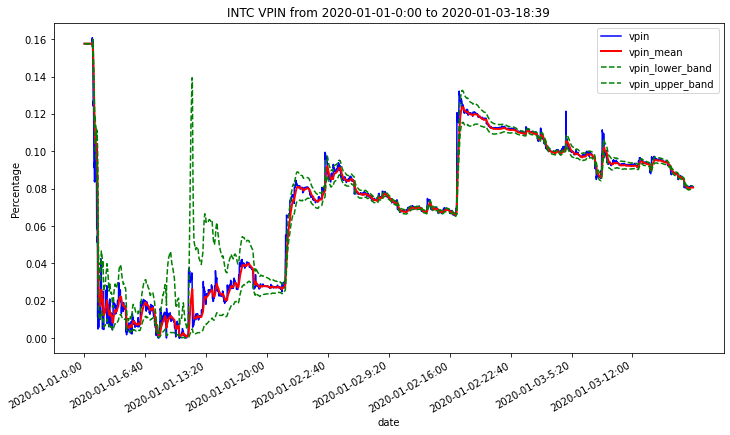

In [70]:
gs_conf_vpin_estimator.plot()